In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ta.trend import MACD

In [11]:
btc_aud_df = pd.read_csv("data/btc_aud_1d.csv")
btc_aud_df.head()

,Time,Open,High,Low,Close,Volume
0,1620172800000,69029.9,74864.4,69029.9,74324.9,12.059667
1,1620259200000,74427.4,75319.6,71406.7,72601.1,8.544883
2,1620345600000,72544.1,75014.2,71527.6,73322.7,12.533144
3,1620432000000,73772.5,76050.8,73119.9,75195.7,18.172034
4,1620518400000,75312.3,75995.9,72184.5,74452.5,14.416112


In [12]:
btc_aud_df["Mid Price"] = 0.5*btc_aud_df["High"] + 0.5*btc_aud_df["Close"]

In [13]:
macd_indicator = MACD(btc_aud_df["Mid Price"])

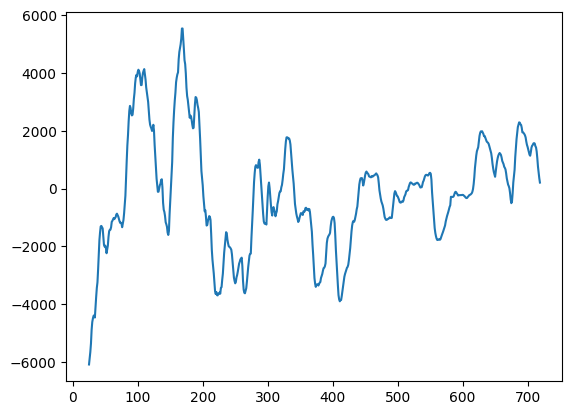

In [14]:
plt.plot(macd_indicator.macd())
plt.show()

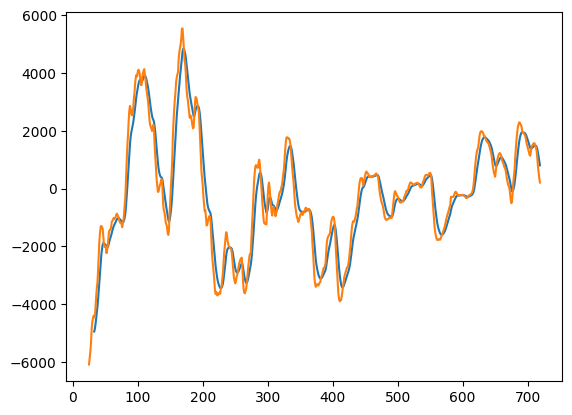

In [18]:
plt.plot(macd_indicator.macd_signal())
plt.plot(macd_indicator.macd())
plt.show()

In [21]:
signals = np.zeros(720)

In [25]:
signals = np.where(macd_indicator.macd() > macd_indicator.macd_signal(), 1.0, 0.0)

In [26]:
signals

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [28]:
positions = np.diff(signals)

In [29]:
positions

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  0.,  0.,  0.,  0.,
        0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
       -1.,  0.,  1.,  0.,  0.,  0.,  0., -1.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0

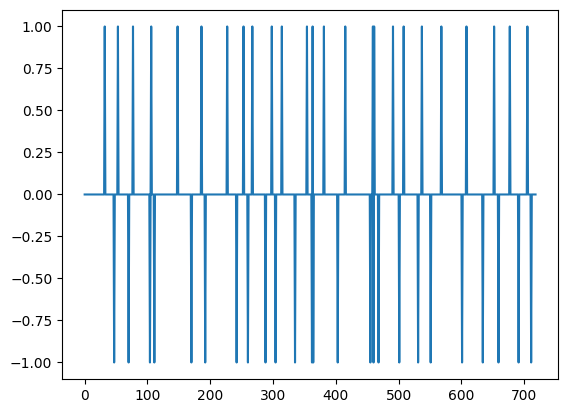

In [30]:
plt.plot(positions)
plt.show()

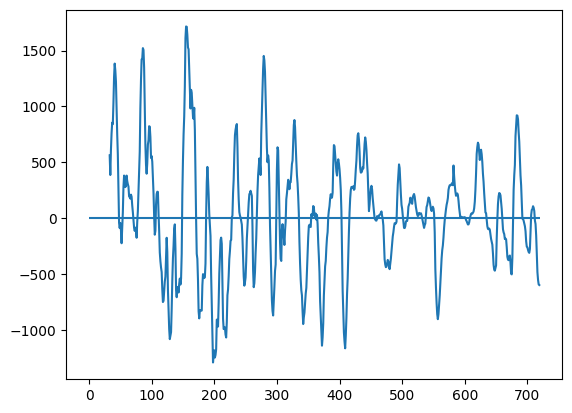

In [34]:
plt.plot(macd_indicator.macd() - macd_indicator.macd_signal())
plt.hlines(0,xmin=0,xmax=720)
plt.show()

In [36]:
print(np.where(positions != 0.0))

(array([ 32,  47,  53,  70,  77, 104, 106, 111, 148, 170, 186, 192, 227,
       242, 253, 260, 267, 288, 298, 304, 314, 335, 354, 362, 363, 364,
       381, 403, 415, 455, 459, 460, 461, 468, 491, 501, 508, 531, 537,
       551, 568, 601, 608, 634, 652, 659, 677, 691, 705, 711], dtype=int64),)
